# Plotting and Visualization

绘图是数据分析工作中最重要的任务之一，是探索过程的一部分，例如，帮助我们找出异常值、必要的数据转换、得出有关模型的idel等。

In [1]:
%pylab inline

import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## A Brief matplotlib API Primer

使用matplotlib的办法有很多种，最常用的方式是pylab模式的ipython(ipython --pylab)。这样会将ipython配置为使用你所指定的matplotlib GUI后端（Tk, wxPython, PyQt, Mac OS X native, GTK）。

### Figures and Subplots

matplotlib 的图像都位于 Figure 对象中。

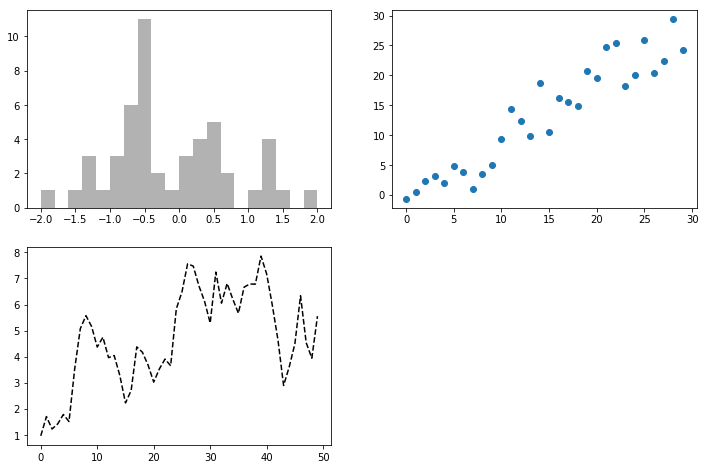

In [2]:
# 用 plt.figure 创建一个新的 Figure
# 用 figsize 选项设定图片保存的大小
fig = plt.figure(figsize=(12,8))

# 不能透过空 Figure 绘图，必须用 add_subplot 创建几个或多个 subplot
# 图像是 2x2，当前选中的是4个 subplot 中的第一个
ax1 = fig.add_subplot(2,2,1)

# 把后面两个subplot也创建出来
# 调用 fig.add_subplot() 返回 AxesSubplot 对象
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)

# 调用 plt.plot() 会在最后一个 subplot 上进行绘制
# 'k--' 是一个线型选项，告诉 matplotlib 绘制黑色虚线
plt.plot(randn(50).cumsum(), 'k--')

# 直接调用 AxesSubplot 对象实例方法，可以在空的格子里绘画
ax1.hist(randn(50), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1134d2410>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113a0ba50>]], dtype=object)

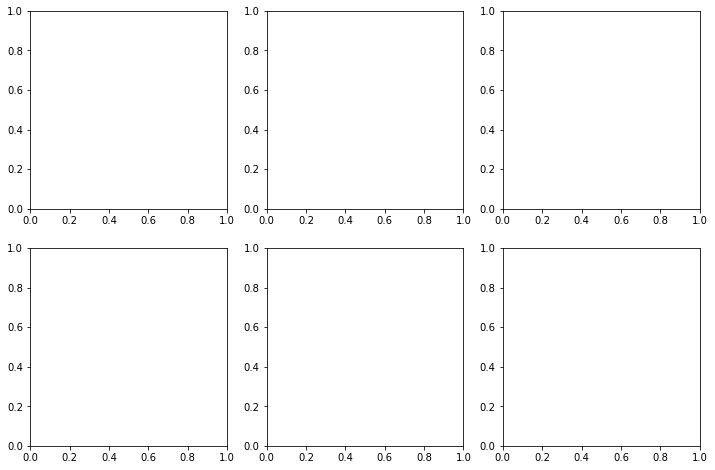

In [3]:
# plt.subplots() 提供更便捷的方法，创建一个新的 Figire
# 返回一个含有 subplot 对象的NumPy 数组
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))

axes

pyplot.subplots 选项

参数 | 说明
---|---
`nrows` | subplot row number
`ncols` | subplot column number
`sharex` | 所有 subplot 应该使用相同的X轴刻度
`sharey` | 所有 subplot 应该使用相同的Y轴刻度
`subplot_kw` | 用于创建各 subplot 的关键字自字典
`**fig_kw` | 创建 figure 时的其他关键字，如 plt.subplots(2,2,figsize=(8,6))

### Adjusting the spacing around subplots

默认，matplotlib 会在 subplot 外围留下一定的边距，并在 subplot 之间留下一定的间距。

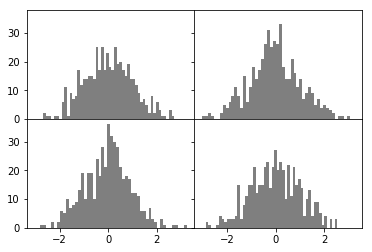

In [4]:
fig, axes = plt.subplots(2,2,sharex=True, sharey=True)

for i in range(2):
    for j in range(2):
        axes[i,j].hist(randn(500), bins=50, color='k', alpha=0.5)

# 利用 Figure.subplots_adjust 方法修改间距
# wspace, hspace 用于控制宽度、高度的百分比，用作 subplot 之间的间距
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, Markers, and Line Styles

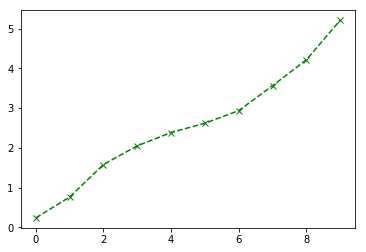

In [5]:
# plot 函数接收一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写

x = np.arange(10)
y = np.random.rand(10).cumsum()

# g: color
# x: marker
# --: linestyle
plt.plot(x, y, 'gx--')

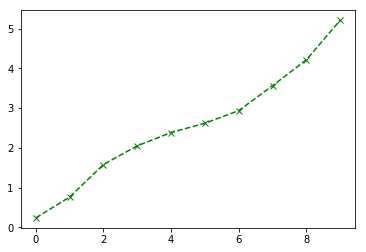

In [6]:
# 明确指定形式

plt.plot(x, y, color='g', marker='x', linestyle='--')

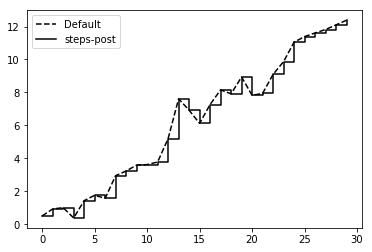

In [7]:
data = randn(30).cumsum()

# 在线型图中，非实际数据点默认是按照线型方式插值
plt.plot(data, 'k--', label='Default')

# 可以通过 drawstyle 修改
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

# 指定图例摆放位置
plt.legend(loc='best')

### Ticks, Labels, and Legends

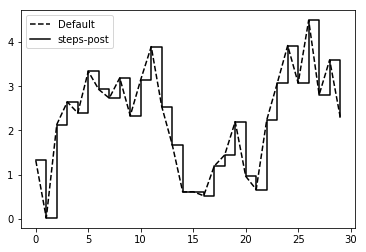

In [8]:
data = randn(30).cumsum()

plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Setting the title, axis labels, ticks, and ticklabels

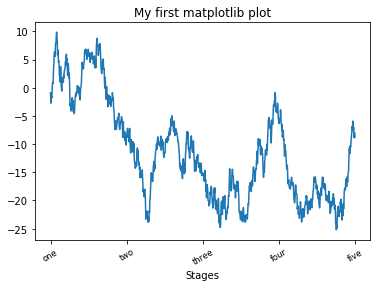

In [9]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(randn(1000).cumsum())

ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

ax.set_title('My first matplotlib plot')
ax.set_xlabel('Stages')

### Adding legends

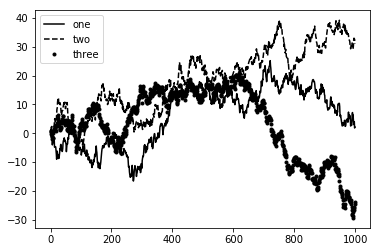

In [10]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

ax.legend(loc='best')

### Annotations and Drawing on a Subplot

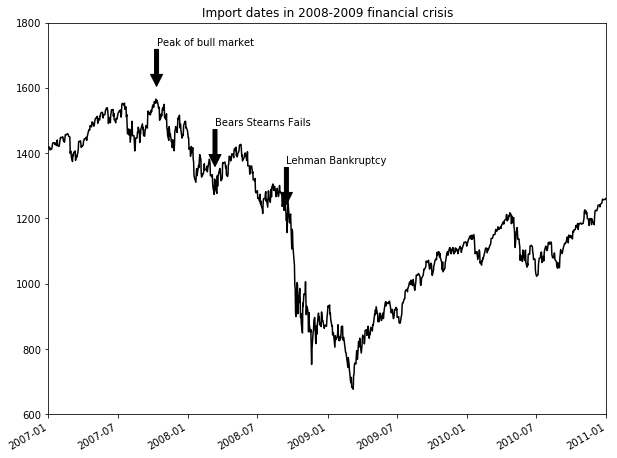

In [11]:
from datetime import datetime

fig = plt.figure(figsize=[10, 8])
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('ch08/spx.csv', index_col=0, parse_dates=True)
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bears Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label,
                xy=(date, spx.asof(date) + 50),
                xytext=(date, spx.asof(date) + 200),
                arrowprops=dict(facecolor='black'),
                horizontalalignment='left',
                verticalalignment='top')

# zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Import dates in 2008-2009 financial crisis')

### Saving Plots to File

In [12]:
fig.savefig('figpath.png', dpi=400, bbox_inches='tight')

## Plotting Functions in pandas
### Line Plots

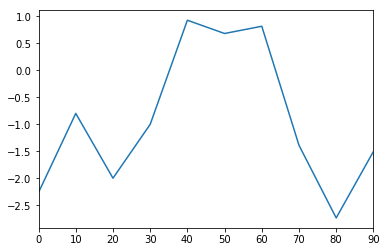

In [13]:
s = Series(np.random.randn(10).cumsum(), index=np.arange(0,100,10))
s.plot()

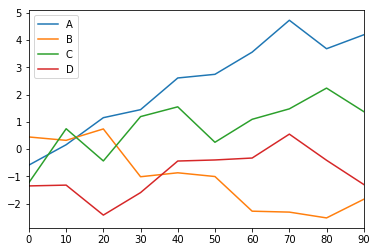

In [14]:
df = DataFrame(np.random.randn(10, 4).cumsum(0),
               columns=['A','B','C','D'],
               index=np.arange(0,100,10))
df.plot()

### Bar Plots

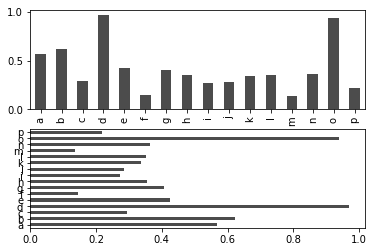

In [15]:
fig, axes = plt.subplots(2, 1)

data = Series(np.random.rand(16), index=list('abcdefghijklmnop'))

data.plot(kind='bar', ax=axes[0], color='k', alpha=0.7)
data.plot(kind='barh', ax=axes[1], color='k', alpha=0.7)

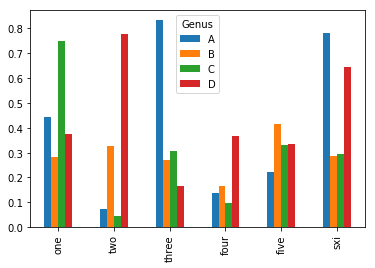

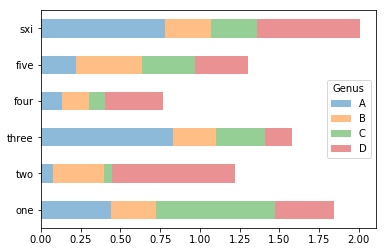

In [16]:
df = DataFrame(np.random.rand(6, 4),
              index=['one', 'two', 'three', 'four', 'five', 'sxi'],
              columns=pd.Index(['A','B','C','D'], name='Genus'))

df.plot(kind='bar')
df.plot(kind='barh', stacked=True, alpha=0.5)

In [17]:
tips = pd.read_csv('ch08/tips.csv')

party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts 

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [18]:
# Not many 1- and 6-person parties
party_counts = party_counts.ix[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [19]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1).astype(float),
                              axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


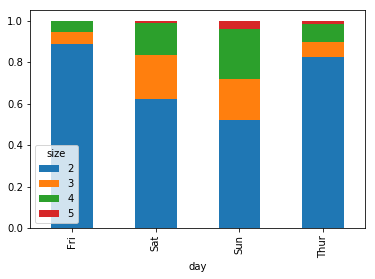

In [20]:
party_pcts.plot(kind='bar', stacked=True)

### Histograms and Density Plots

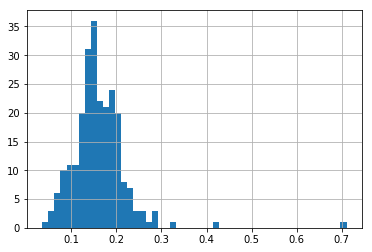

In [21]:
tips['tip_pct'] = tips['tip']/tips['total_bill']
tips['tip_pct'].hist(bins=50)

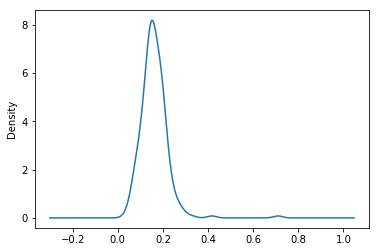

In [22]:
# a density plot using the standard mixture-of-normals KDE (kernel density estimate)

tips['tip_pct'].plot(kind='kde')

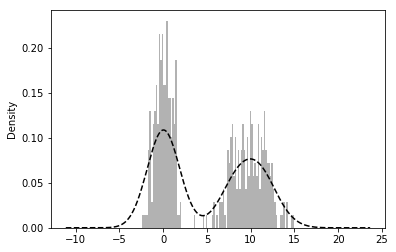

In [23]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)

values = Series(np.concatenate([comp1, comp2]))

values.hist(bins=100, alpha=0.3, color='k', normed=True)
values.plot(kind='kde', style='k--')

### Scatter Plots

In [24]:
macro = pd.read_csv('ch08/macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


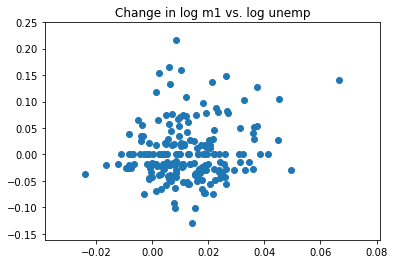

In [25]:
plt.scatter(trans_data['m1'], trans_data['unemp'])
plt.title('Change in log %s vs. log %s' % ('m1', 'unemp'))

### Plotting Maps: Visualizing Haiti Earthquake Crisis Data

In [26]:
data = pd.read_csv('ch08/Haiti.csv')
data

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
1,4051,"Food-Aid sent to Fondwa, Haiti",28/06/2010 23:06,fondwa,Please help food-aid.org deliver more food to ...,"1. Urgences | Emergency, 2. Urgences logistiqu...",50.226029,5.729886,NO,NO
2,4050,how haiti is right now and how it was during t...,24/06/2010 16:21,centrie,i feel so bad for you i know i am supposed to ...,"2. Urgences logistiques | Vital Lines, 8. Autr...",22.278381,114.174287,NO,NO
3,4049,Lost person,20/06/2010 21:59,Genoca,We are family members of Juan Antonio Zuniga O...,"1. Urgences | Emergency,",44.407062,8.933989,NO,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO
8,4038,No electricity in pernier,15/03/2010 10:58,Pernier,why the people who lives in pernier doesn't fi...,"2. Urgences logistiques | Vital Lines, 2f. San...",18.517443,-72.236841,YES,NO
9,4037,Shelter and food needed at Lamentin 54 and Rue...,15/03/2010 11:00,Intersection of Lamentin 54 and Rue St Juste,"GOOD EVENING ONG, I'M VERY HAPPY FOR THE AID Y...","2. Urgences logistiques | Vital Lines, 2d. Ref...",18.547790,-72.410010,YES,NO


In [27]:
data[['INCIDENT DATE', 'LATITUDE', 'LONGITUDE']][:10]

,INCIDENT DATE,LATITUDE,LONGITUDE
0,05/07/2010 17:26,18.233333,-72.533333
1,28/06/2010 23:06,50.226029,5.729886
2,24/06/2010 16:21,22.278381,114.174287
3,20/06/2010 21:59,44.407062,8.933989
4,18/05/2010 16:26,18.571084,-72.334671
5,26/04/2010 13:14,18.593707,-72.310079
6,26/04/2010 14:19,18.482800,-73.638800
7,26/04/2010 14:27,18.415000,-73.195000
8,15/03/2010 10:58,18.517443,-72.236841
9,15/03/2010 11:00,18.547790,-72.410010


In [28]:
data['CATEGORY'][:6]

0          1. Urgences | Emergency, 3. Public Health, 
1    1. Urgences | Emergency, 2. Urgences logistiqu...
2    2. Urgences logistiques | Vital Lines, 8. Autr...
3                            1. Urgences | Emergency, 
4                            1. Urgences | Emergency, 
5                       5e. Communication lines down, 
Name: CATEGORY, dtype: object

In [29]:
data.describe()

,Serial,LATITUDE,LONGITUDE
count,3593.000000,3593.000000,3593.000000
mean,2080.277484,18.611495,-72.322680
std,1171.100360,0.738572,3.650776
min,4.000000,18.041313,-74.452757
25%,1074.000000,18.524070,-72.417500
50%,2163.000000,18.539269,-72.335000
75%,3088.000000,18.561820,-72.293570
max,4052.000000,50.226029,114.174287


In [30]:
# Cleaning the bad locations and removing the missing categories

data = data[(data.LATITUDE > 18) & (data.LATITUDE < 20) &
            (data.LONGITUDE > -75) & (data.LONGITUDE < -70) &
            data.CATEGORY.notnull()]

data[:5]

,Serial,INCIDENT TITLE,INCIDENT DATE,LOCATION,DESCRIPTION,CATEGORY,LATITUDE,LONGITUDE,APPROVED,VERIFIED
0,4052,* URGENT * Type O blood donations needed in #J...,05/07/2010 17:26,"Jacmel, Haiti",Birthing Clinic in Jacmel #Haiti urgently need...,"1. Urgences | Emergency, 3. Public Health,",18.233333,-72.533333,YES,NO
4,4042,Citi Soleil school,18/05/2010 16:26,"Citi Soleil, Haiti",We are working with Haitian (NGO) -The Christi...,"1. Urgences | Emergency,",18.571084,-72.334671,YES,NO
5,4041,Radio Commerce in Sarthe,26/04/2010 13:14,"Radio Commerce Shelter, Sarthe",i'm Louinel from Sarthe. I'd to know what can ...,"5e. Communication lines down,",18.593707,-72.310079,YES,NO
6,4040,Contaminated water in Baraderes.,26/04/2010 14:19,Marc near Baraderes,How do we treat water in areas without Pipe?\t...,"4. Menaces | Security Threats, 4e. Assainissem...",18.482800,-73.638800,YES,NO
7,4039,Violence at &quot;arcahaie bas Saint-Ard&quot;,26/04/2010 14:27,unable to find &quot;arcahaie bas Saint-Ard&qu...,Goodnight at (arcahaie bas Saint-Ard) 2 young ...,"4. Menaces | Security Threats,",18.415000,-73.195000,YES,NO


In [31]:
def to_cat_list(catstr):
    stripped = (x.strip() for x in catstr.split(','))
    return [x for x in stripped if x]

def get_all_categories(cat_series):
    cat_sets = (set(to_cat_list(x)) for x in cat_series)
    return sorted(set.union(*cat_sets))

def get_english(cat):
    code, names = cat.split('.')
    if '|' in names:
        names = names.split('|')[1]
    return code, names.strip()

get_english('2. Urgences logistiques | Vital Lines')

('2', 'Vital Lines')

In [32]:
all_cats = get_all_categories(data.CATEGORY)

# Generator expression
english_mapping = dict(get_english(x) for x in all_cats)

english_mapping['2a'], english_mapping['6c']

('Food Shortage', 'Earthquake and aftershocks')

In [33]:
def get_code(seq):
    return [x.split('.')[0] for x in seq if x]

all_codes = get_code(all_cats)
code_index = pd.Index(np.unique(all_codes))
dummy_frame = DataFrame(np.zeros((len(data), len(code_index))), 
                       index=data.index, columns=code_index)

dummy_frame.ix[:, :6]

,1,1a,1b,1c,1d,2
0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
for row, cat in zip(data.index, data.CATEGORY):
    codes = get_code(to_cat_list(cat))
    dummy_frame.ix[row, codes] = 1
    
data = data.join(dummy_frame.add_prefix('category_'))
data.ix[:, 10:15]

,category_1,category_1a,category_1b,category_1c,category_1d
0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0
10,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0


In [ ]:
from mpl_toolkits.basemap import Basemap

def basic_haiti_map(ax=None, lllat=17.25, urlat=20.25, lllon=-75, urlon=-71):
    # create polar stereographic Basemap instance.
    m = Basemap(ax=ax, projection='stere',
               lon_0=(urlon + lllon)/2,
               lat_0=(urlat + lllat)/2,
               llcrnrlat=lllat, urcrnrlat=urlat,
               llcrnrlon=lllon, urcrnrlon=urlon,
               resolution='f')
    # draw coastlines, state and country boundares, edge of map
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

to_plot = ['2a', '1', '3c', '7a']

lllat=17.25; urlat=20.25; lllon=-75; urlon=-71

for code, ax in zip(to_plot, axes.flat):
    m = basic_haiti_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
    
    cat_data = data[data['category_%s' % code] ==1]
    
    # compute map proj coordinates
    x, y = m(cat_data.LONGITUDE.values, cat_data.LATITUDE.values)
    
    m.plot(x, y, 'k.', alpha=0.5)
    ax.set_title('%s: %s' % (code, english_mapping[code]))

/Users/hugo/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/hugo/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
